<a href="https://colab.research.google.com/github/SyedAnasAli3/Track/blob/master/Conv_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import random

Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The number of images is not equal to the number of labels." 

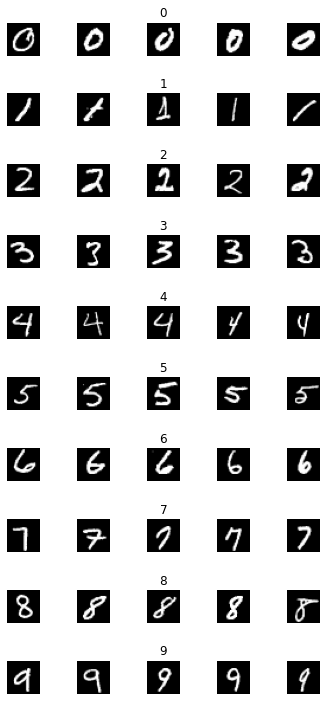

In [ ]:
no_of_samples = []
no_of_cols = 5
no_of_classes = 10

fig, axs = plt.subplots(nrows=no_of_classes, ncols=no_of_cols, figsize=(5,10))
fig.tight_layout()

for i in range(no_of_cols):
  for j in range(no_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1) , :, :] , cmap = plt.get_cmap('gray') )
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      no_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


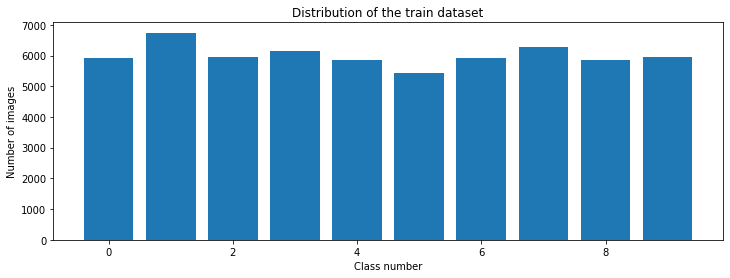

In [ ]:
print(no_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, no_of_classes), no_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

The first step is to add a depth (here of 1 cz of gray scale and if it were rgb then this would be 3) for convolution to take place. 

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

Now starts CNETs

In [ ]:
#define the leNet model function:
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(no_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

1) Conv2D(30) means 30 filters used in the first layer which a trial and error based param. this here is good enough to classify ou dataset and not be overly computation expensive. (5,5) is the filter size. Now our (28,28) image will be reduced to 30 feature maps(24,24) cz 28 -(5-1) 5 cz (5,5). And so now the total output parameters will be (30*5*5)+30{weights} = 780{adjustable parameters}.  this function can take more arguments: such as strides=increments by which the filter is convoluted on the image(a smaller stride will retain more info as more convolutional operations are conducted); and padding= half or same,valid, casual. half or same means edges as also preserved.{Convolution Layer 1} 
2) MaxPool(pool_size=(2,2) means 2x2pool size reduces feature map to half of its size by scaling it down.=>(24,24,30) to (12,12,30){output shape} overall the size of our image decreases and starts to gain depth, which contains features extrated from our image. {Pooling layer 1} 
3) Conv2D(15) 15 filters now used; (3,3)filter size; output parameters will be (15*30{depth from previous output}*3*3)+15{bias parameters for each filter or  weights}= 4065{adjustable parameters}. (10,10,15){output shape}10cz 12-3-1 as(3,3filter size){Convolution Layer 2}
4) MaxPool(pool_size=(2,2)=>reduces feature map to half of its size by scaling it down to {output shape}(5,5,15).{Pooling layer 2}
5) model.add(Flatten()) flattens our {output data shape} (none,375) 5*5*15=375 to a 1D array.
6) model.add(Dense(500) 500 is a trail and error number which is optimum considering our data.{This is the fully connected layer}
7) model.add(Dense(no_of_classes, activation='softmax')) {Output Layer}

More than one dropout layers can be used to obtain the desired performance.
These layers can be plcaed between the convolutional layers or in between our fully connected layers. typically the dropout laayers are used in between the layers that have a high number of parameters cz these are the ones which are more likely to overfit and memorize training data. fraction rate is the amount of input nodes that the drop out layer drops during each update {0=>nodes are dropped & 1=> all inputs are dropped} we ll use 0.5recommeded by researchers.
model.add(Dropout(fraction rate))

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1, batch_size = 400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.2374 - accuracy: 0.9242 - val_loss: 0.0547 - val_accuracy: 0.9852
Epoch 2/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0780 - accuracy: 0.9758 - val_loss: 0.0496 - val_accuracy: 0.9853
Epoch 3/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 4/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.0444 - val_accuracy: 0.9882
Epoch 5/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0433 - accuracy: 0.9866 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0456 - accuracy: 0.9854 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 7/10
54000/54000 [==============================] - 2s 35us/st

Text(0.5, 0, 'epochs')

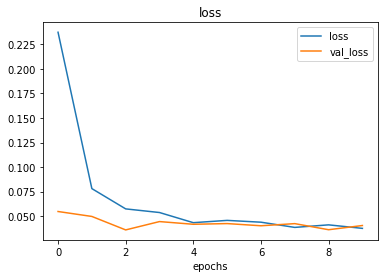

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

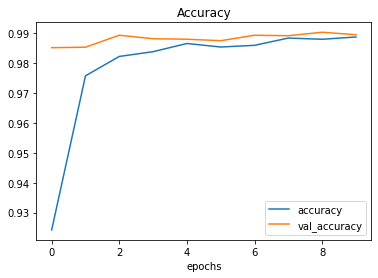

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')

<Response [200]>


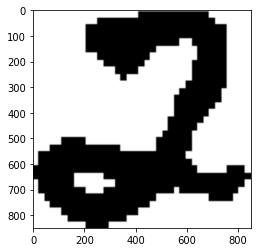

In [ ]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

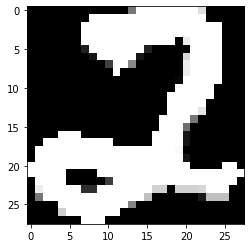

In [ ]:
import cv2
img = np.asarray(img)
resized = cv2.resize(img, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [ ]:
image = image/ 255
image = image.reshape(1,28,28,1)

In [ ]:
prediction = model.predict_classes(image)
print('Predicted digit:', str(prediction))

Predicted digit: [2]


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print("Test Score", score[0])
print("Test Accuracy", score[1])

<class 'list'>
Test Score 0.036934339618069544
Test Accuracy 0.9900000095367432


In [ ]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output)
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


Model class api allows us to instantiate layers from pre trained models effectively allowing us to reuse sections of previously trained models. We use this for visualizing here.
model(2args) 1st-> all inputs, 2nd all outputs u want.

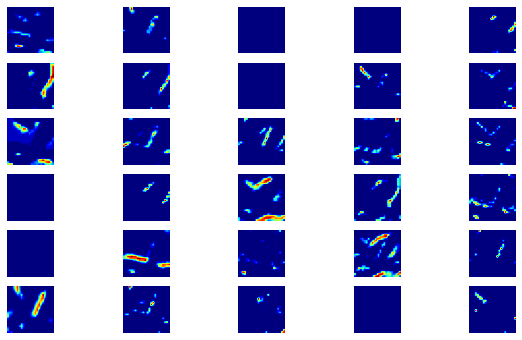

In [ ]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6, 5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

We can see the various features extracted by the for loop by each of our 30 filters using the jet color map.{Red corresponds to areas with the highest intensity and the color blue highlights the areas with the lowest intensity.}

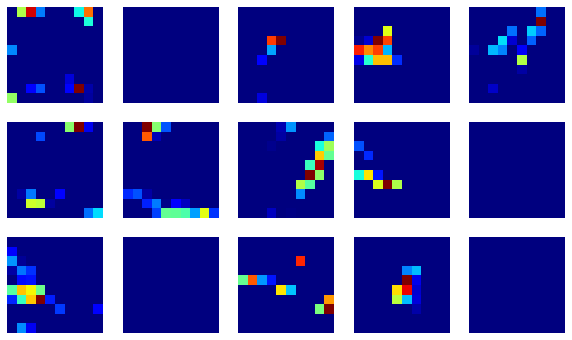

In [ ]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  plt.axis('off')